### Preprocessesing

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


medical_dataset = pd.read_csv('/content/medical_students_dataset (1).csv')
medical_dataset.head()   #shows first 5 rows of the dataset ; if given heart_dataset.head(3) then it would show first 3 rows

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [ ]:
medical_dataset.shape     # shows the number of rows and columns in tuple (rows,columns)

(200000, 13)

In [ ]:
medical_dataset.isnull().sum()      # shows total no of Null values in each colmn

# for this dataset , we can delete the null values that is less than 0.5% of the total dataset


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


## IMPUTING

Student ID


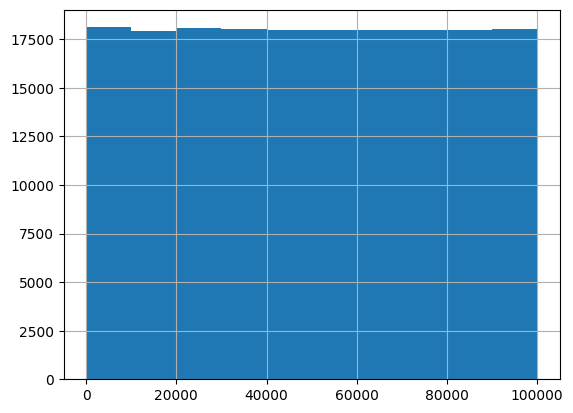



Age


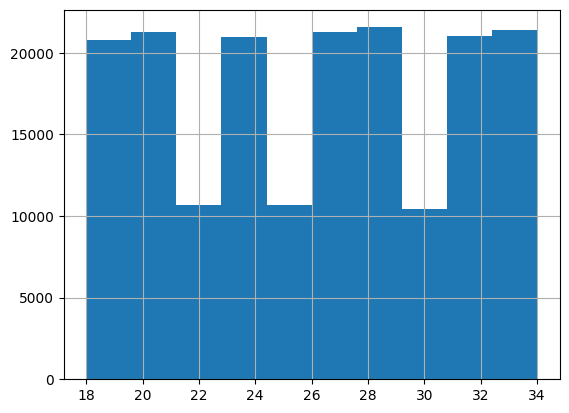



Gender


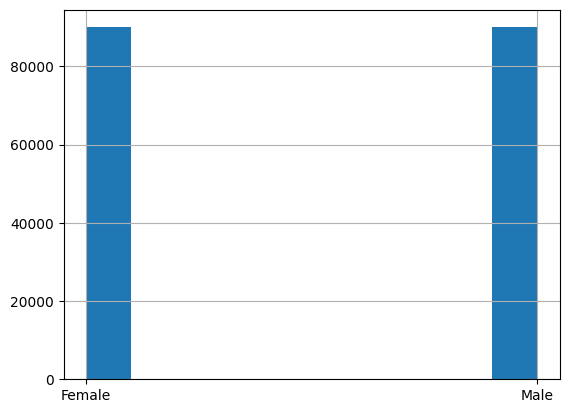



Height


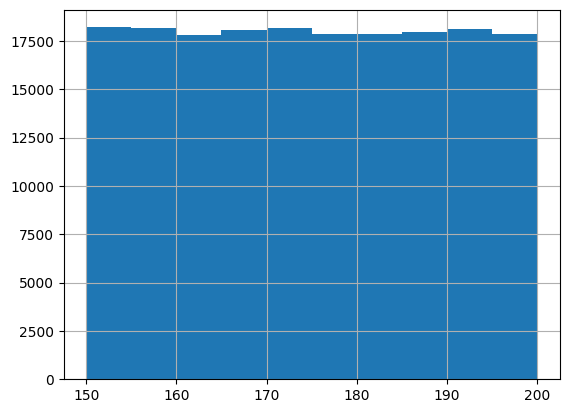



Blood Type


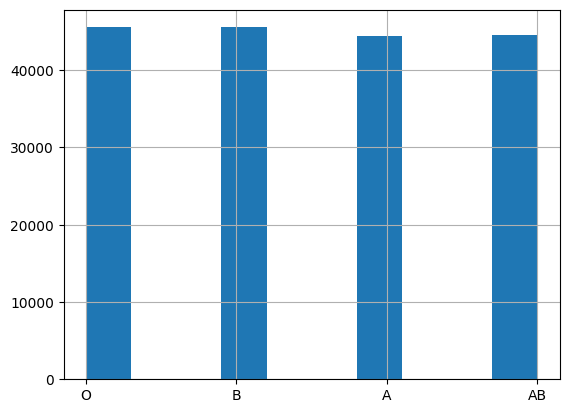



Weight


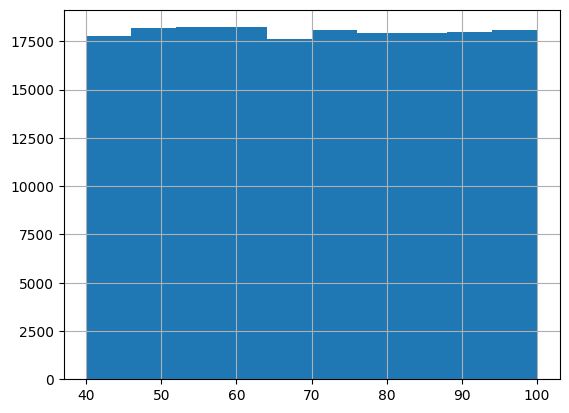



BMI


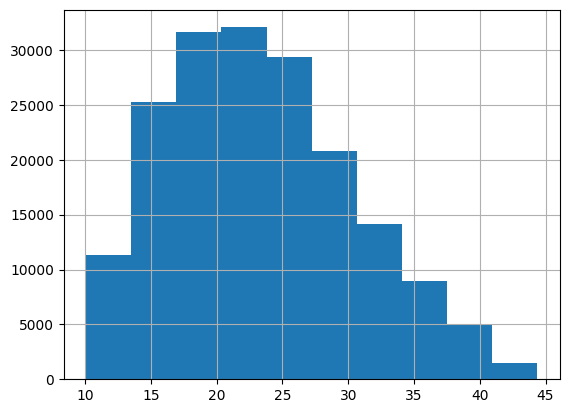



Temperature


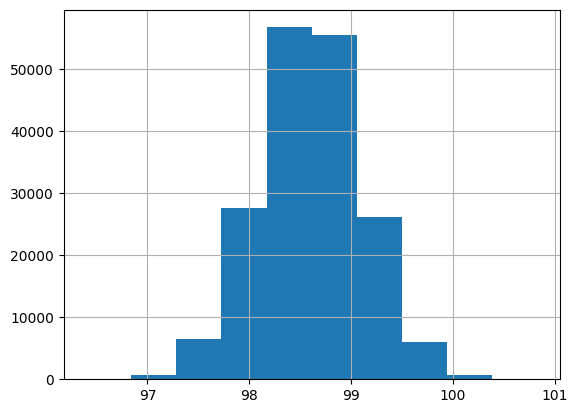



Heart Rate


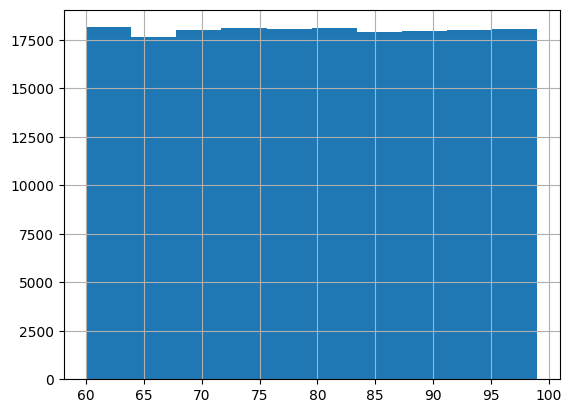



Blood Pressure


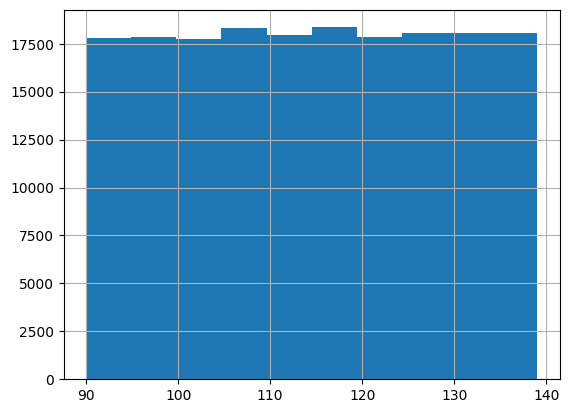



Cholesterol


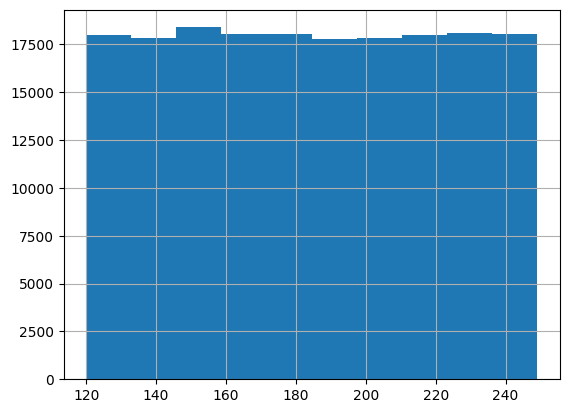



Diabetes


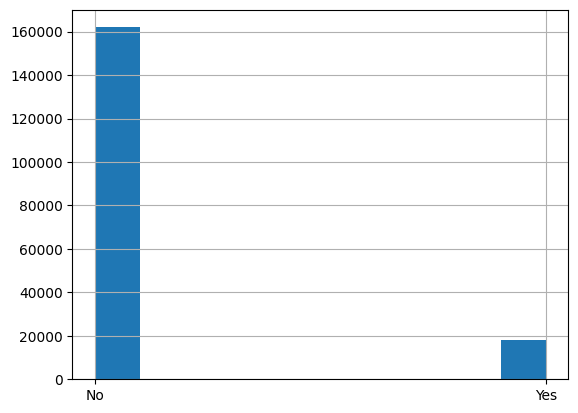



Smoking


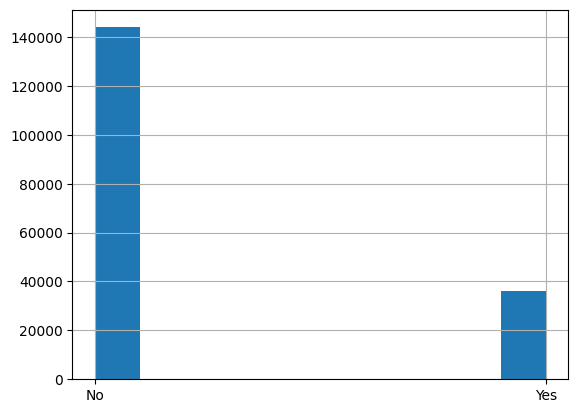

,count
Smoking,
No,143971
Yes,36029


In [ ]:
# all have 10% None values, so cannot delete the rows
# trying to see what is impute with - mean / median for all the columns
# if balanced value --> mean
#if unbalanced value or outlines --> median



print("Student ID")
medical_dataset['Student ID'].hist()
plt.show()
print()
print()


print("Age")
medical_dataset['Age'].hist()
plt.show()
print()
print()


print("Gender")
medical_dataset['Gender'].hist()
plt.show()
print()
print()


print("Height")
medical_dataset['Height'].hist()
plt.show()
print()
print()


print("Blood Type")
medical_dataset['Blood Type'].hist()
plt.show()
print()
print()


print("Weight")
medical_dataset['Weight'].hist()
plt.show()
print()
print()

print("BMI")
medical_dataset['BMI'].hist()
plt.show()
print()
print()


print("Temperature")
medical_dataset['Temperature'].hist()
plt.show()
print()
print()


print("Heart Rate")
medical_dataset['Heart Rate'].hist()
plt.show()
print()
print()
print("Blood Pressure")
medical_dataset['Blood Pressure'].hist()
plt.show()
print()
print()

print("Cholesterol")
medical_dataset['Cholesterol'].hist()
plt.show()
print()
print()

print("Diabetes")
medical_dataset['Diabetes'].hist()
plt.show()
print()
print()

print("Smoking")
medical_dataset['Smoking'].hist()
plt.show()
print()
print()
medical_dataset['Smoking'].value_counts()


In [ ]:
#Diabetes and Smoking direct impute because otherwiseit will be too much No and very very less yes
# Student Id, height, Heart rate, Blood pressure, Cholestrol should be mean because No extreme outliners
# Age, BMI, temp Should be median as there is extreme outliners
# Gender and blood type should be divided into halfand do mode or else 10% data will be a lot of data to be imputed witht he mode of the column. it might be biased
# For Smoking and Student Id , i think we can take some approach like gender but dividing it in 10 or 20 parts

#Realized that the student ID is not a meaning full feature for learning , so let's drop this
medical_dataset.drop(columns=['Student ID'], inplace=True)
medical_dataset.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [ ]:

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(medical_dataset[['Height']])
medical_dataset['Height'] = impute.transform(medical_dataset[['Height']])


impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(medical_dataset[['Heart Rate']])
medical_dataset['Heart Rate'] = impute.transform(medical_dataset[['Heart Rate']])


impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(medical_dataset[['Blood Pressure']])
medical_dataset['Blood Pressure'] = impute.transform(medical_dataset[['Blood Pressure']])


impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(medical_dataset[['Cholesterol']])
medical_dataset['Cholesterol'] = impute.transform(medical_dataset[['Cholesterol']])


impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(medical_dataset[['Weight']])
medical_dataset['Weight'] = impute.transform(medical_dataset[['Weight']])


impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(medical_dataset[['Age']])
medical_dataset['Age'] = impute.transform(medical_dataset[['Age']])


impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(medical_dataset[['BMI']])
medical_dataset['BMI'] = impute.transform(medical_dataset[['BMI']])


impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(medical_dataset[['Temperature']])
medical_dataset['Temperature'] = impute.transform(medical_dataset[['Temperature']])









## Let's Now impute with MOde

In [ ]:
# Split the dataset
first_half = medical_dataset.iloc[:100000].copy()
second_half = medical_dataset.iloc[100000:].copy()

# Compute mode of each half
gender_mode_first_half = first_half['Gender'].mode()[0]
gender_mode_second_half = second_half['Gender'].mode()[0]

bloodtype_mode_first_half = first_half['Blood Type'].mode()[0]
bloodtype_mode_second_half = second_half['Blood Type'].mode()[0]

# Impute missing values in each half separately
first_half['Gender'].fillna(gender_mode_first_half, inplace=True)
second_half['Gender'].fillna(gender_mode_second_half, inplace=True)

first_half['Blood Type'].fillna(bloodtype_mode_first_half, inplace=True)
second_half['Blood Type'].fillna(bloodtype_mode_second_half, inplace=True)


# Combine the dataset back
medical_dataset = pd.concat([first_half, second_half], ignore_index=True)



<ipython-input-125-ecff32c45104>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  first_half['Gender'].fillna(gender_mode_first_half, inplace=True)
<ipython-input-125-ecff32c45104>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
# i will impute the smoking by dividing into 10 parts and then replace it witht he mode of that specific part

# Divide the dataset into 10 equal parts
chunks = []
chunk_size = len(medical_dataset) // 10

for i in range(10):
    start = i * chunk_size
    end = (i + 1) * chunk_size if i < 9 else len(medical_dataset)  # Handle any remainder in the last chunk
    chunk = medical_dataset.iloc[start:end].copy()

    # Compute mode for 'Smoking' in this chunk
    if 'Smoking' in chunk.columns:
        mode_bloodtype = chunk['Smoking'].mode()[0]
        chunk['Smoking'].fillna(mode_bloodtype, inplace=True)

    chunks.append(chunk)

# Concatenate all the processed chunks back
medical_dataset = pd.concat(chunks, ignore_index=True)

In [ ]:
#imputing Cholestrol with Yes as the ratio of Yes and No is very large
medical_dataset= medical_dataset.fillna("Yes")
medical_dataset.isnull().sum()



## ENCODING for non-numerical values

In [ ]:
#Using label encoding for gender, Diabetes and Smoking because there is only two type of values


# Set up the LabelEncoder object
lebel = LabelEncoder()

# Encode 'gender' column
medical_dataset['Gender_enc'] = lebel.fit_transform(medical_dataset['Gender'])

# Compare the two columns
print(medical_dataset[['Gender', 'Gender_enc']].head())

medical_dataset = medical_dataset.drop('Gender', axis=1)



# Encode 'Diabetes' column
medical_dataset['Diabetes_enc'] = lebel.fit_transform(medical_dataset['Diabetes'])

# Compare the two columns
print(medical_dataset[['Diabetes', 'Diabetes_enc']].head())

medical_dataset = medical_dataset.drop('Diabetes', axis=1)




# Encode 'Smoking' column
medical_dataset['Smoking_enc'] = lebel.fit_transform(medical_dataset['Smoking'])

# Compare the two columns
print(medical_dataset[['Smoking', 'Smoking_enc']].head())

medical_dataset = medical_dataset.drop('Smoking', axis=1)


medical_dataset.shape


   Gender  Gender_enc
0  Female           0
1    Male           1
2  Female           0
3    Male           1
4  Female           0
  Diabetes  Diabetes_enc
0       No             0
1       No             0
2      Yes             1
3       No             0
4       No             0
  Smoking  Smoking_enc
0      No            0
1      No            0
2      No            0
3     Yes            1
4      No            0


(200000, 12)

In [ ]:
medical_dataset.head()   # Just checking if the column heads updated or not :)


,Age,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender_enc,Diabetes_enc,Smoking_enc
0,18.0,161.777924,72.354947,O,27.645835,98.599654,95.0,109.000000,203.0,0,0,0
1,26.0,152.069157,47.630941,B,22.671401,98.714977,93.0,104.000000,163.0,1,0,0
2,32.0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,0,1,0
3,30.0,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,1,0,1
4,23.0,174.947103,46.234173,O,22.671401,98.480008,95.0,114.558033,231.0,0,0,0


## One HOT Encoding ⚡

In [ ]:
medical_dataset['Blood Type'].unique()
medical_dataset= pd.get_dummies(medical_dataset, columns=['Blood Type'], prefix='BloodType')
medical_dataset.head()

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender_enc,Diabetes_enc,Smoking_enc,BloodType_A,BloodType_AB,BloodType_B,BloodType_O
0,18.0,161.777924,72.354947,27.645835,98.599654,95.0,109.000000,203.0,0,0,0,False,False,False,True
1,26.0,152.069157,47.630941,22.671401,98.714977,93.0,104.000000,163.0,1,0,0,False,False,True,False
2,32.0,182.537664,55.741083,16.729017,98.260293,76.0,130.000000,216.0,0,1,0,True,False,False,False
3,30.0,182.112867,63.332207,19.096042,98.839605,99.0,112.000000,141.0,1,0,1,False,False,True,False
4,23.0,174.947103,46.234173,22.671401,98.480008,95.0,114.558033,231.0,0,0,0,False,False,False,True


# ## SCALLING to non-binary columns as if we scale we will get only 0 and 1 . ⚖

In [ ]:
#will find skewness to determine what kind of scalling needed
#if very skewed (skew>1 or skew<-1), that means extreme points exists, then only use robust scalling


print("Skewness of Age:", medical_dataset['Age'].skew())
print("Skewness of Height:", medical_dataset['Height'].skew())
print("Skewness of Weight:", medical_dataset['Weight'].skew())
print("Skewness of BMI:", medical_dataset['BMI'].skew())
print("Skewness of Temperature:", medical_dataset['Temperature'].skew())
print("Skewness of Heart Rate:", medical_dataset['Heart Rate'].skew())
print("Skewness of Blood Pressure:", medical_dataset['Blood Pressure'].skew())
print("Skewness of Cholesterol:", medical_dataset['Cholesterol'].skew())

Skewness of Age: -0.00215371653914054
Skewness of Height: 0.0023958556061436454
Skewness of Weight: 0.005080698101923629
Skewness of BMI: 0.491335681586128
Skewness of Temperature: 0.011851010142954756
Skewness of Heart Rate: -0.0011207673020937755
Skewness of Blood Pressure: -0.0050913585124579205
Skewness of Cholesterol: 0.004379797773808013



#Standard scalling for all as all of them falls under the range ⚖

In [ ]:
from imblearn.over_sampling import SMOTE

X = medical_dataset.drop('Smoking_enc', axis=1)
y = medical_dataset['Smoking_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_resample(X_train, y_train)
standard_cols = ['Age', 'Height','Weight', 'BMI', 'Temperature' , 'Heart Rate','Blood Pressure', 'Cholesterol' ]


standard_scaler = StandardScaler()
X_train[standard_cols] = standard_scaler.fit_transform(X_train[standard_cols])
X_test[standard_cols] = standard_scaler.transform(X_test[standard_cols])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score

# Initialize KNN model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=2)

# Make predictions on test set
knn_prediction = knn_model.fit(X_train, y_train).predict(X_test)
knn_accuracy=  accuracy_score(y_test, knn_prediction)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != knn_prediction).sum()))
print()
print("Accuracy:", accuracy_score(y_test, knn_prediction))




Number of mislabeled points out of a total 60000 points : 12999

Accuracy: 0.78335


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
# Initialize Decision Tree model
tree_model = DecisionTreeClassifier(random_state=0,class_weight='balanced')

# Make predictions on test set
tree_prediction = tree_model.fit(X_train, y_train).predict(X_test)
tree_accuracy=accuracy_score(y_test, tree_prediction)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != tree_prediction).sum()))
print()
print("Accuracy:", accuracy_score(y_test, tree_prediction))

Number of mislabeled points out of a total 60000 points : 14965

Accuracy: 0.7505833333333334


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score

NaiveBayes_model = GaussianNB()
NaiveBayes_prediction = NaiveBayes_model.fit(X_train, y_train).predict(X_test)
NB_accuracy= accuracy_score(y_test, NaiveBayes_prediction)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != NaiveBayes_prediction).sum()))
print()
print("Accuracy:", accuracy_score(y_test, NaiveBayes_prediction))

Number of mislabeled points out of a total 60000 points : 26804

Accuracy: 0.5532666666666667


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score

# Initialize Logistic Regression model
LogisticRegression_model= LogisticRegression(random_state=0, max_iter=1000)

LogisticRegression_prediction = LogisticRegression_model.fit(X_train, y_train).predict(X_test)
LR_accuracy= accuracy_score(y_test, LogisticRegression_prediction)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != LogisticRegression_prediction).sum()))
print()
print("Accuracy:", accuracy_score(y_test, LogisticRegression_prediction))

Number of mislabeled points out of a total 60000 points : 10776

Accuracy: 0.8204


### Neural Network

In [ ]:
import numpy as np

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#Activation Function

class ReLU:
    # Apply activation function
    def forwardPropagation(self, inp: np.array) -> np.array:
        self.inputAct = np.maximum(0, inp)
        return self.inputAct

    # Calculate derivative of the activation function
    def backPropagation(self, delta: np.array) -> np.array:
        return delta * np.where(self.inputAct > 0, 1, 0)

In [ ]:
#Loss Function

class MeanSquareError:
  def loss(self, Y: np.array, y:np.array) -> np.array:
      self.Y = Y
      self.y = y
      return np.absolute((Y - y) ** 2).sum() / y.shape[0]

  # Calculate derivative of the loss function
  def deriv(self) -> np.array:
      return (self.Y - self.y) / self.y.shape[0]

In [ ]:
#Optimizer

class GradientDescent:
    def __init__(self, learningRate) -> None:
        self.learningRate = learningRate

    # Calculate gradients
    def gradients(self, gradients) -> np.array:
        return self.learningRate * gradients

In [ ]:
#Necassary Functions

# To get activation function
def getActivationFunction(activation: str) -> object:
    if activation == "RELU":
        return ReLU
    else:
        raise Exception("Cannot find the activation function.")

# To get loss function
def getLossFunction(loss: str) -> object:
    if loss == "MSE":
        return MeanSquareError
    else:
        raise Exception("Cannot find the loss function.")

# To get optimizer
def getOptimizer(optimizer: str) -> object:
    if optimizer == "GD":
        return GradientDescent
    else:
        raise Exception("Cannot find the optimizer.")

In [ ]:
#Single Layer of Neurons



class NeuronLayer:
    def __init__(self, inputNeurons, outputNeurons, activation, biasFlag = True, randomState = 42) -> None:
        np.random.seed(randomState)
        # set variables
        self.inputNeurons = inputNeurons
        self.outputNeurons = outputNeurons
        self.biasFlag = biasFlag

        # get activation
        self.activation = getActivationFunction(activation)()

        # initiate parameters
        self.weights = self.__initParameters((self.inputNeurons, self.outputNeurons))
        self.bias = self.__initParameters((1, self.outputNeurons))

    # Parameter initializer
    def __initParameters(self, dimension: tuple) -> np.array:
        return np.random.uniform(-np.sqrt(2/(dimension[0] + dimension[1])), np.sqrt(2/(dimension[0] + dimension[1])),size = (dimension[0], dimension[1]))

    def build(self, optimizer, learningRate) -> None:
        self.learningRate = learningRate
        self.optimizer = getOptimizer(optimizer)(learningRate)

    # Apply forward propagation
    def forwardPropagation(self, X: np.array) -> np.array:
        self.X = X

        # Calculate weighted sum
        self.output = np.dot(self.X, self.weights) + (self.biasFlag * self.bias)
        # Apply activation function
        self.output = self.activation.forwardPropagation(self.output)

        return self.output

    # Apply backpropagation
    def backPropagation(self, upstreamGradient: np.array) -> np.array:
        # Calculate activation gradients
        delta = self.activation.backPropagation(upstreamGradient)

        # Calculate parameter gradients
        weightGrad = np.dot(self.X.T, delta) / self.X.shape[0]
        biasGrad = np.dot(np.ones((1, self.X.shape[0])), delta) /  self.X.shape[0]

        # Update parameters
        self.weights -= self.optimizer.gradients(weightGrad)
        self.bias -= self.optimizer.gradients(biasGrad)

        # Calculate downstream gradients
        downstreamGradient = np.dot(delta, self.weights.T) / self.X.shape[0]

        return downstreamGradient

In [ ]:
#Model


class Model:
    # Create mini-batches
    def __createBatch(self, X: np.array, Y: np.array, batchSize: int) -> tuple:
        miniX, miniY = np.array([X[:batchSize]]), np.array([Y[:batchSize]])

        for idx in range(1, X.shape[0] // batchSize):
            miniX = np.append(miniX, np.array([X[idx * batchSize : (idx + 1) * batchSize]]), axis = 0)
            miniY = np.append(miniY, np.array([Y[idx * batchSize : (idx + 1) * batchSize]]), axis = 0)

        return miniX, miniY

    # Apply forward propagation over the model
    def __forwardPropagation(self, X: np.array) -> np.array:
        output = X
        for layer in self.layers:
            output = layer.forwardPropagation(output)
        return output

    # Apply backpropagation over the model
    def __backPropagation(self, Y: np.array) -> None:
        gradient = Y
        for layer in self.layers[::-1]:
            gradient = layer.backPropagation(gradient)

    def layers(self, layers: list) -> None:
        self.layers = layers

    # Compile the model
    def compile(self, loss, optimizer, learningRate) -> None:
        self.loss = getLossFunction(loss)()
        for layer in self.layers[::-1]:
            layer.build(optimizer, learningRate)

    # Predict the output
    def predict(self, X: np.array) -> np.array:
        return self.__forwardPropagation(X)

    # Evaluate the model
    def evaluate(self, X: np.array, Y: np.array) -> np.array:
        output = self.predict(X)
        return self.loss.loss(output, Y)

    # Train the model
    def fit(self, X: np.array, Y: np.array, epochs: int, batchSize = None) -> np.array:
        # Create mini-batch
        batchSize = (batchSize if batchSize else X.shape[0])
        self.X, self.Y = self.__createBatch(X, Y, batchSize)

        self.error = np.array([])
        # Run epoch
        for epoch in range(epochs):
            epochError = np.array([])

            # Iterate over mini-batches
            for idx in range(self.X.shape[0]):
                epochError = np.append(epochError, self.loss.loss(self.__forwardPropagation(self.X[idx]), self.Y[idx]))
                self.__backPropagation(self.loss.deriv())

            # Print epoch information
            epochError /= epochError.shape[0]
            self.error = np.append(self.error, epochError.sum() / epochError.shape[0])
            print("Epoch:", epoch + 1, "Error:", round(epochError[0], 2))

        return self.error


In [ ]:
#Model Training

# Step 4: Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Step 5: Convert to float64 NumPy arrays
X_train_array = X_train.values.astype(np.float64)
X_test_array = X_test.values.astype(np.float64)
y_train_array = y_train.values.astype(np.float64).reshape(-1, 1)
y_test_array = y_test.values.astype(np.float64).reshape(-1, 1)

# Step 6: Define your model structure (Assumes custom classes already defined)
model = Model()
model.layers = [NeuronLayer(X_train_array.shape[1], 64, "RELU"), NeuronLayer(64, 1, "RELU")]


# Step 7: Compile the model
model.compile(loss="MSE", optimizer="GD", learningRate=0.01)


# Step 8: Train the model
training_Error = model.fit(X_train_array, y_train_array, epochs=100, batchSize=None)

# Step 9: Predict and evaluate (optional)
y_pred_rounded = np.round(y_pred)

# Now compute accuracy
accuracy = accuracy_score(y_test_array, y_pred_rounded)
print("Accuracy:", accuracy)

Epoch: 1 Error: 0.5
Epoch: 2 Error: 0.5
Epoch: 3 Error: 0.5
Epoch: 4 Error: 0.5
Epoch: 5 Error: 0.5
Epoch: 6 Error: 0.5
Epoch: 7 Error: 0.5
Epoch: 8 Error: 0.5
Epoch: 9 Error: 0.5
Epoch: 10 Error: 0.5
Epoch: 11 Error: 0.5
Epoch: 12 Error: 0.5
Epoch: 13 Error: 0.5
Epoch: 14 Error: 0.5
Epoch: 15 Error: 0.5
Epoch: 16 Error: 0.5
Epoch: 17 Error: 0.5
Epoch: 18 Error: 0.5
Epoch: 19 Error: 0.5
Epoch: 20 Error: 0.5
Epoch: 21 Error: 0.5
Epoch: 22 Error: 0.5
Epoch: 23 Error: 0.5
Epoch: 24 Error: 0.5
Epoch: 25 Error: 0.5
Epoch: 26 Error: 0.5
Epoch: 27 Error: 0.5
Epoch: 28 Error: 0.5
Epoch: 29 Error: 0.5
Epoch: 30 Error: 0.5
Epoch: 31 Error: 0.5
Epoch: 32 Error: 0.5
Epoch: 33 Error: 0.5
Epoch: 34 Error: 0.5
Epoch: 35 Error: 0.5
Epoch: 36 Error: 0.5
Epoch: 37 Error: 0.5
Epoch: 38 Error: 0.5
Epoch: 39 Error: 0.5
Epoch: 40 Error: 0.5
Epoch: 41 Error: 0.5
Epoch: 42 Error: 0.5
Epoch: 43 Error: 0.5
Epoch: 44 Error: 0.5
Epoch: 45 Error: 0.5
Epoch: 46 Error: 0.5
Epoch: 47 Error: 0.5
Epoch: 48 Error: 0.5
E

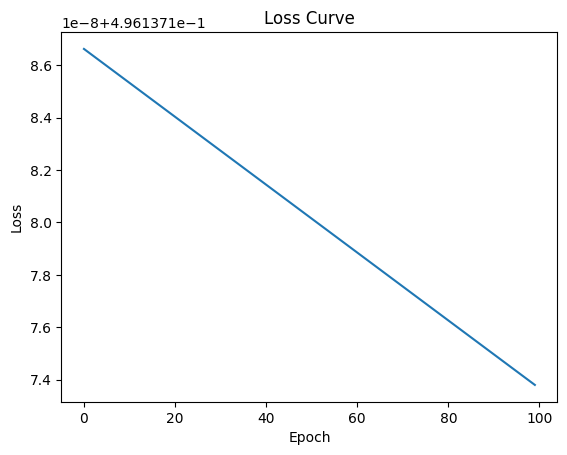

Testing Error: 0.18


In [ ]:
#Model Evaluation


# Plot loss curve
plt.plot(training_Error)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#Print test error
print(f"Testing Error: {round(model.evaluate(X_test_array, y_test_array), 2)}")

## **EVALUATING THE MODEL'S PERFORMANCE:**

## Compute ROC & AUC and Plot

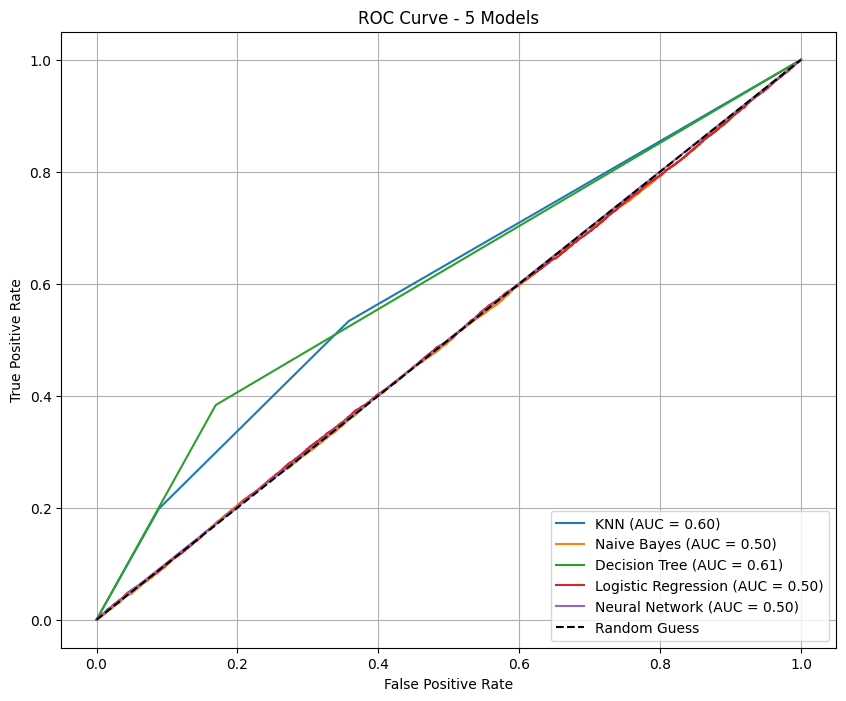

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define your sklearn models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=0,class_weight='balanced'),
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=1000,class_weight='balanced')
}

plt.figure(figsize=(10, 8))

# Train, predict probabilities, and plot ROC
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# NEURAL NETWORK
y_pred_nn = model.predict(X_test.values.astype(np.float64)).reshape(-1)

# Convert raw output to probabilities (if using RELU)
y_probs_nn = np.clip(y_pred_nn, 0, 1)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 5 Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




### Multiclass Confusion Matrix & Accuracy

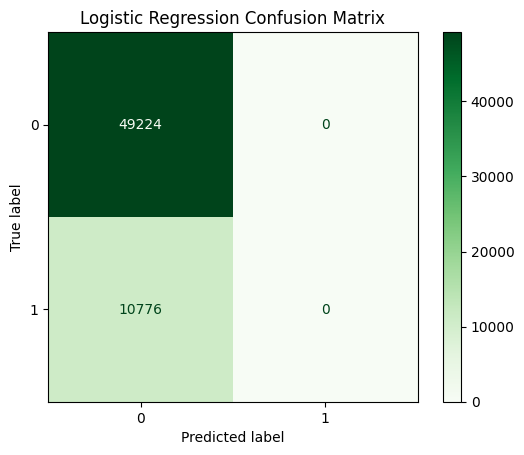

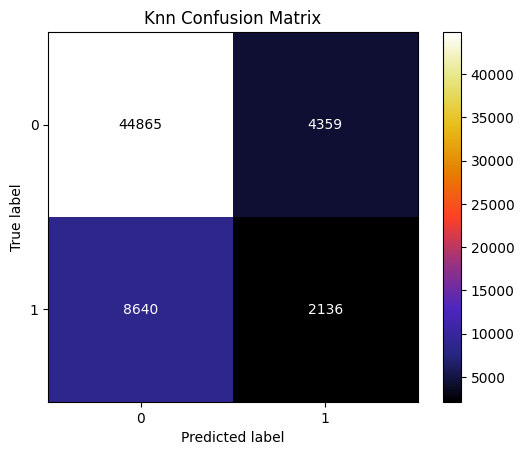

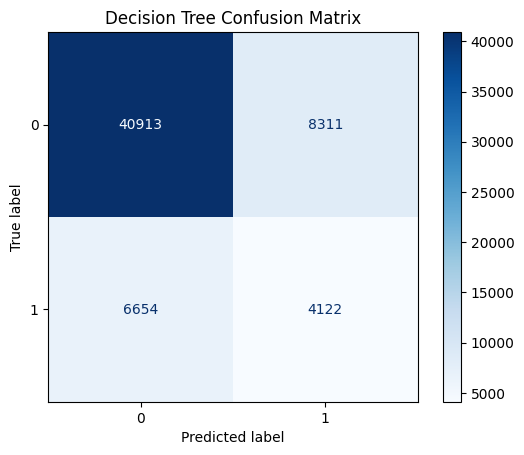

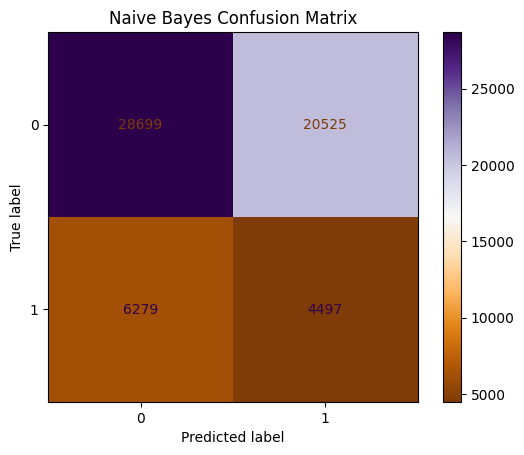

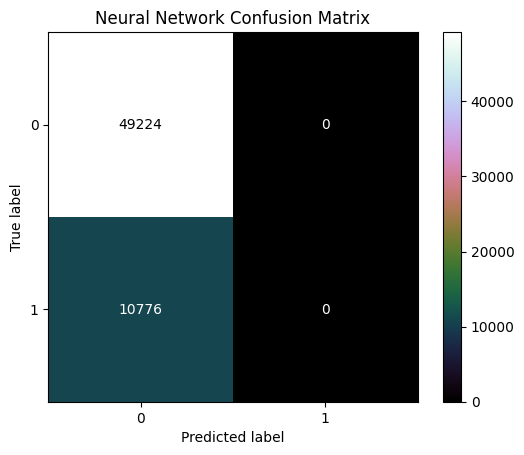

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

cm_logistic = confusion_matrix(y_test, LogisticRegression_prediction)
ConfusionMatrixDisplay(cm_logistic, display_labels=["0", "1"]).plot(cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

cm_Knn = confusion_matrix(y_test, knn_prediction)
ConfusionMatrixDisplay(cm_Knn, display_labels=["0", "1"]).plot(cmap="CMRmap")
plt.title("Knn Confusion Matrix")
plt.show()

cm_tree = confusion_matrix(y_test, tree_prediction)
ConfusionMatrixDisplay(cm_tree, display_labels=["0", "1"]).plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

cm_Naive= confusion_matrix(y_test, NaiveBayes_prediction)
ConfusionMatrixDisplay(cm_Naive, display_labels=["0", "1"]).plot(cmap="PuOr")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

cm_NN = confusion_matrix(y_test, y_pred_rounded)
ConfusionMatrixDisplay(cm_NN, display_labels=["0", "1"]).plot(cmap="cubehelix")
plt.title("Neural Network Confusion Matrix")
plt.show()

##  Advanced Evaluation ( Precision, recall and F1 score)

In [ ]:
from sklearn.metrics import classification_report

print("Knn:")
print(classification_report(y_test, knn_prediction, target_names=["0", "1"]))

print("Decision Tree:")
print(classification_report(y_test, tree_prediction, target_names=["0", "1"]))

print("Naive Bayes:")
print(classification_report(y_test, NaiveBayes_prediction, target_names=["0", "1"]))

print("Logistic Regression:")
print(classification_report(y_test, LogisticRegression_prediction, target_names=["0", "1"]))

print("Neural Network:")
print(classification_report(y_test, y_pred_rounded, target_names=["0", "1"]))

Knn:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     49224
           1       0.33      0.20      0.25     10776

    accuracy                           0.78     60000
   macro avg       0.58      0.55      0.56     60000
weighted avg       0.75      0.78      0.76     60000

Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     49224
           1       0.33      0.38      0.36     10776

    accuracy                           0.75     60000
   macro avg       0.60      0.61      0.60     60000
weighted avg       0.77      0.75      0.76     60000

Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68     49224
           1       0.18      0.42      0.25     10776

    accuracy                           0.55     60000
   macro avg       0.50      0.50      0.47     60000
weighted avg       0.71      0.55      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

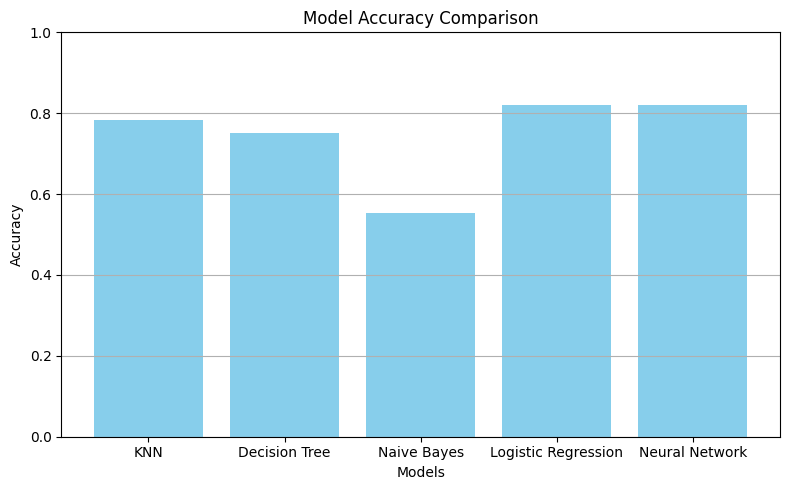

In [ ]:
import matplotlib.pyplot as plt

# Step 1: List of model names and their accuracy scores
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'Neural Network']
accuracy_scores = [knn_accuracy, tree_accuracy, NB_accuracy, LR_accuracy, accuracy]

# Step 2: Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='y')
plt.tight_layout()
plt.show()


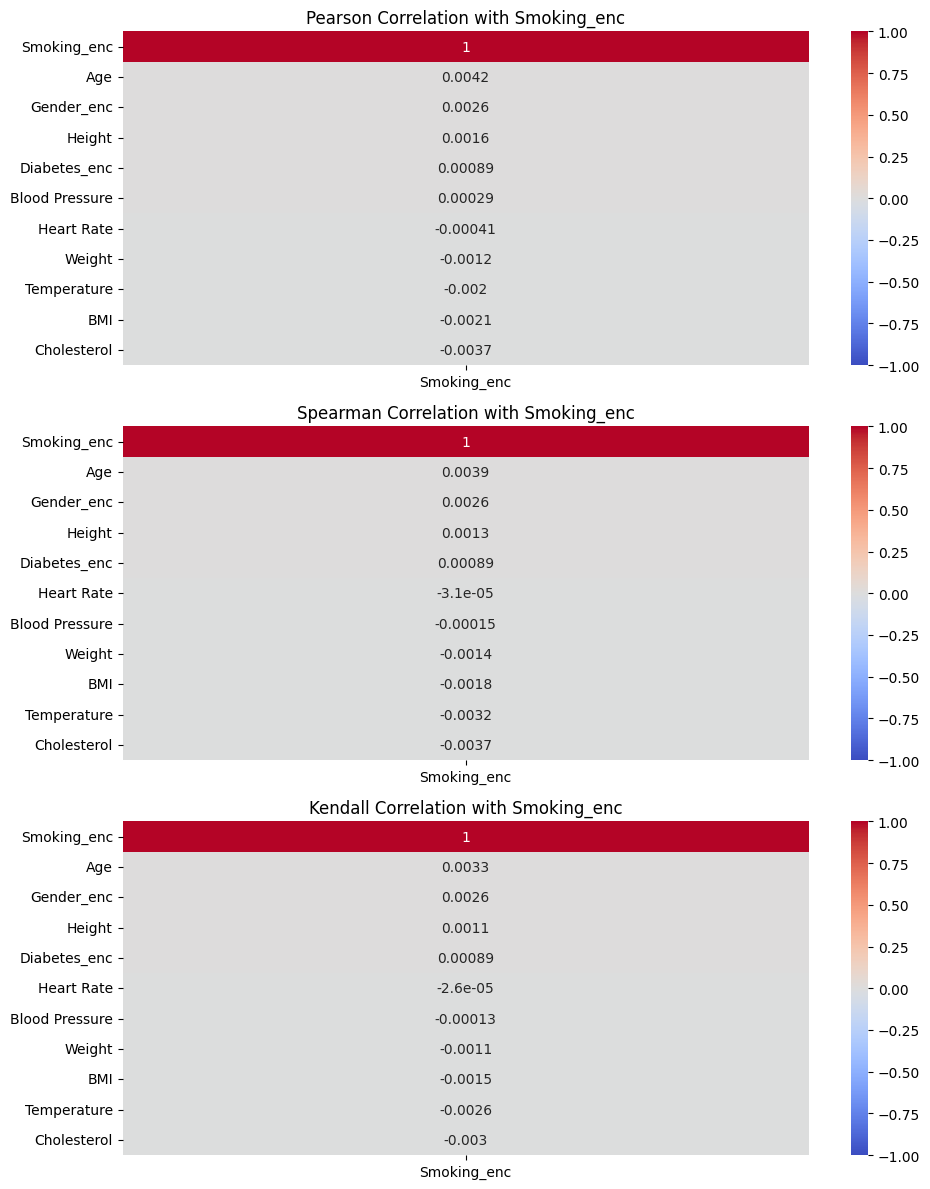

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features including the target
numerical_data = medical_dataset.select_dtypes(include=['number'])

# Create subplots: 3 rows, 1 column
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Compute correlation coefficients using three different methods
corr1 = numerical_data.corr(method='pearson')[['Smoking_enc']].sort_values(by='Smoking_enc', ascending=False)
corr2 = numerical_data.corr(method='spearman')[['Smoking_enc']].sort_values(by='Smoking_enc', ascending=False)
corr3 = numerical_data.corr(method='kendall')[['Smoking_enc']].sort_values(by='Smoking_enc', ascending=False)

# Set titles
ax[0].set_title('Pearson Correlation with Smoking_enc')
ax[1].set_title('Spearman Correlation with Smoking_enc')
ax[2].set_title('Kendall Correlation with Smoking_enc')

# Generate heatmaps
sns.heatmap(corr1, ax=ax[0], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.heatmap(corr2, ax=ax[1], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.heatmap(corr3, ax=ax[2], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Adjust layout
plt.tight_layout()
plt.show()


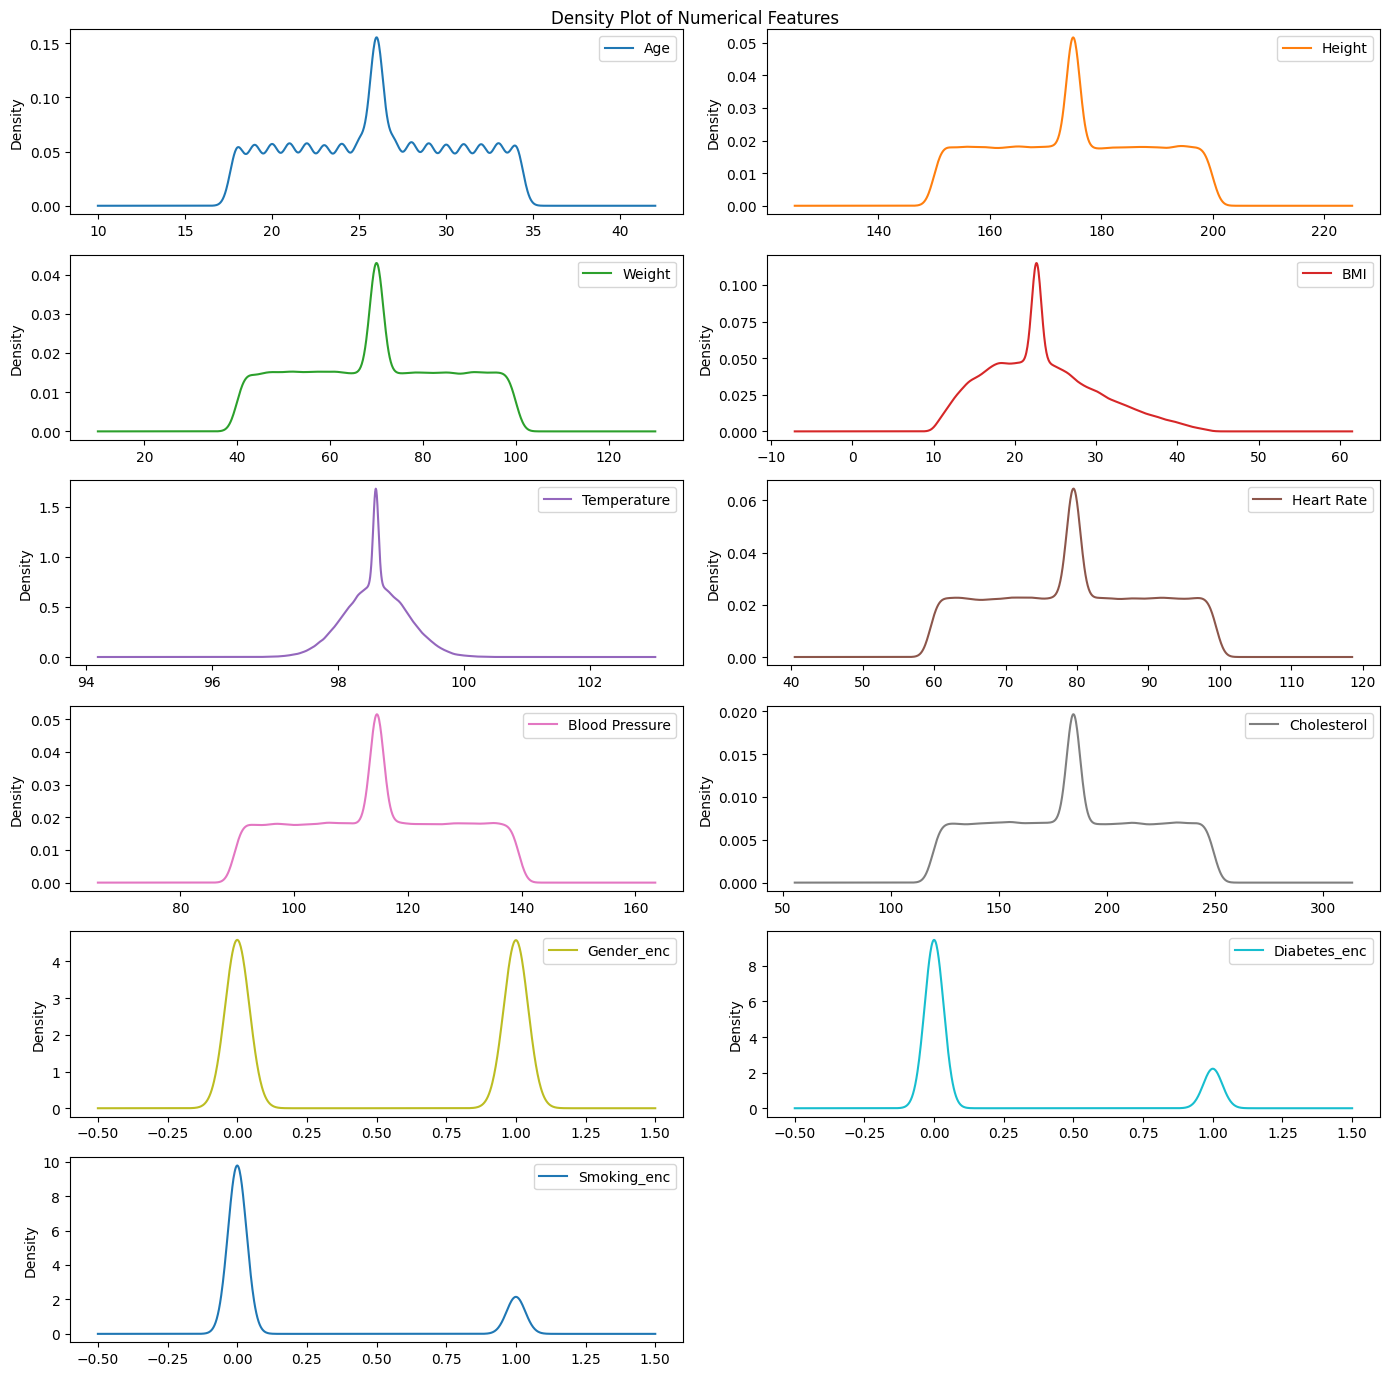

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns only (including or excluding 'Smoking_enc' as needed)
numerical_data = medical_dataset.select_dtypes(include='number')

# Generate density plots
numerical_data.plot(
    kind='density',
    figsize=(14, 14),
    subplots=True,
    layout=(6, 2),
    title='Density Plot of Numerical Features',
    sharex=False
)

plt.tight_layout()
plt.show()
